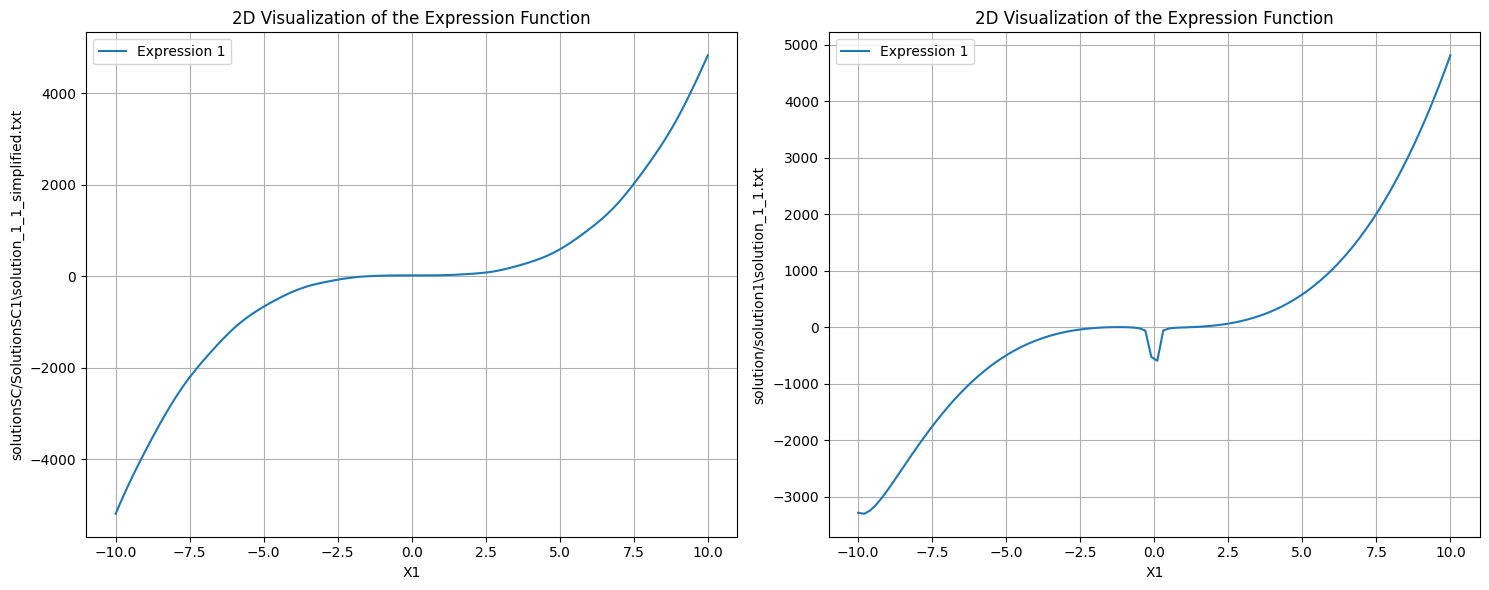

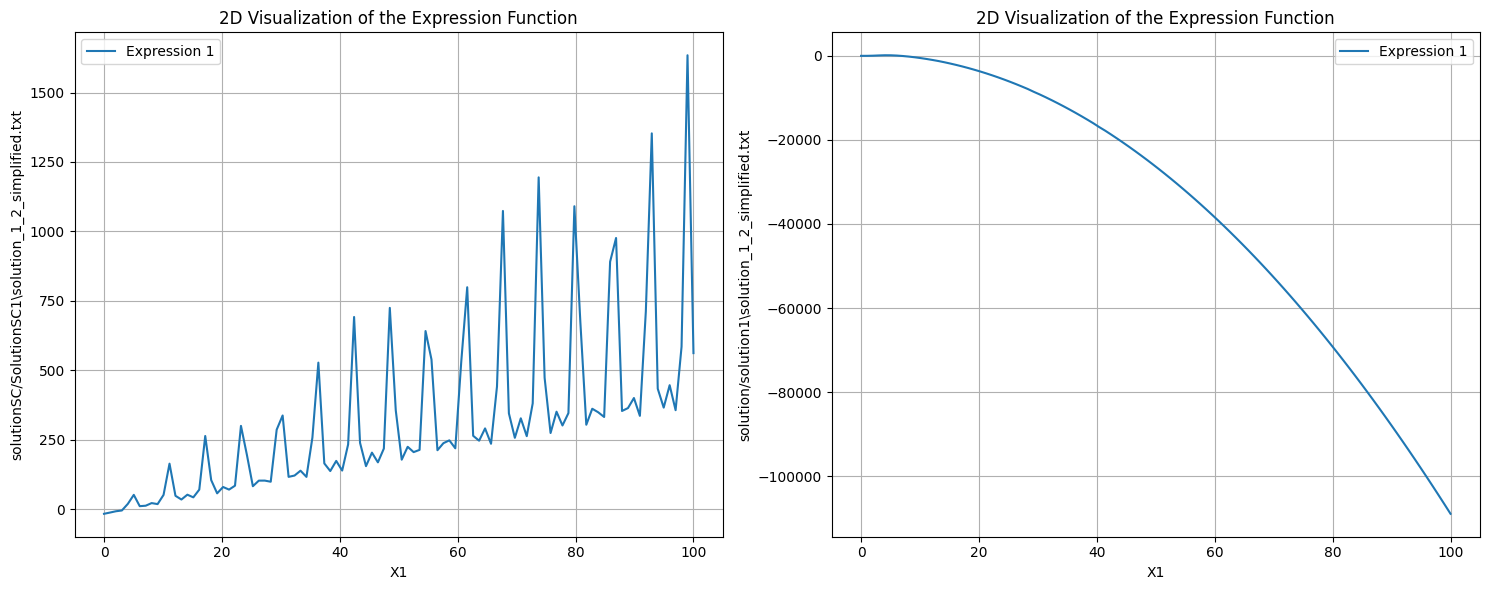

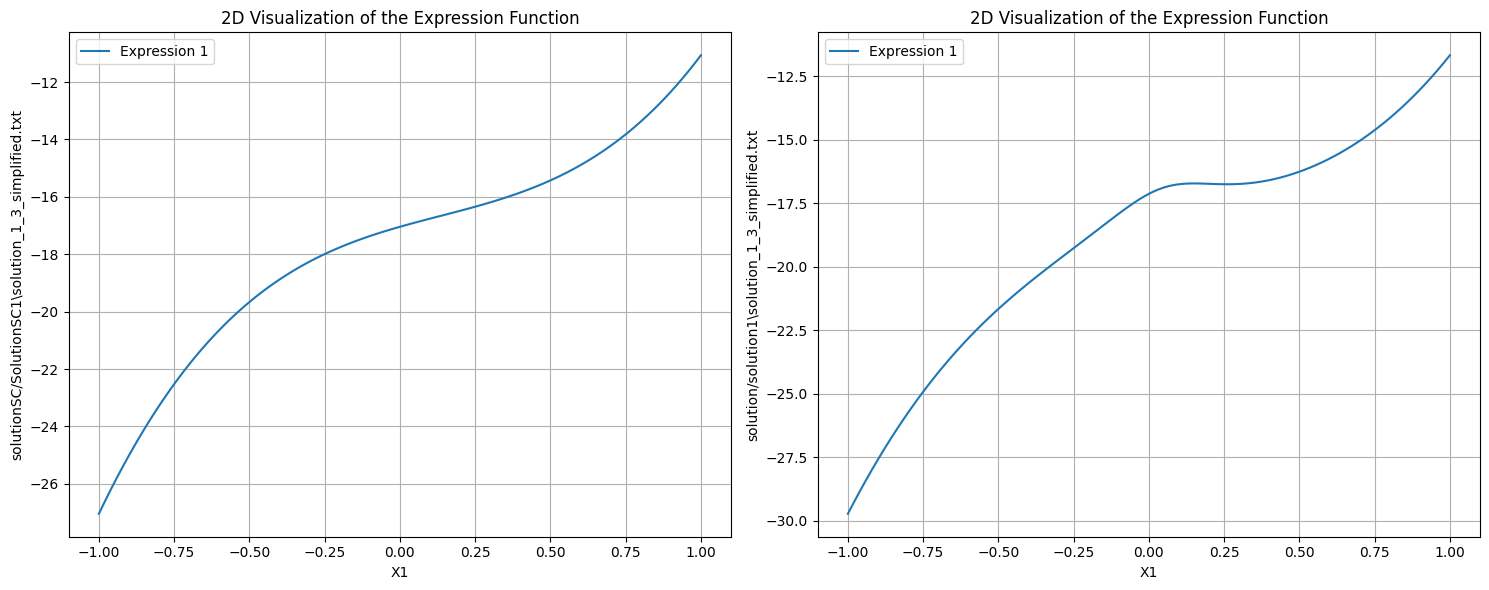

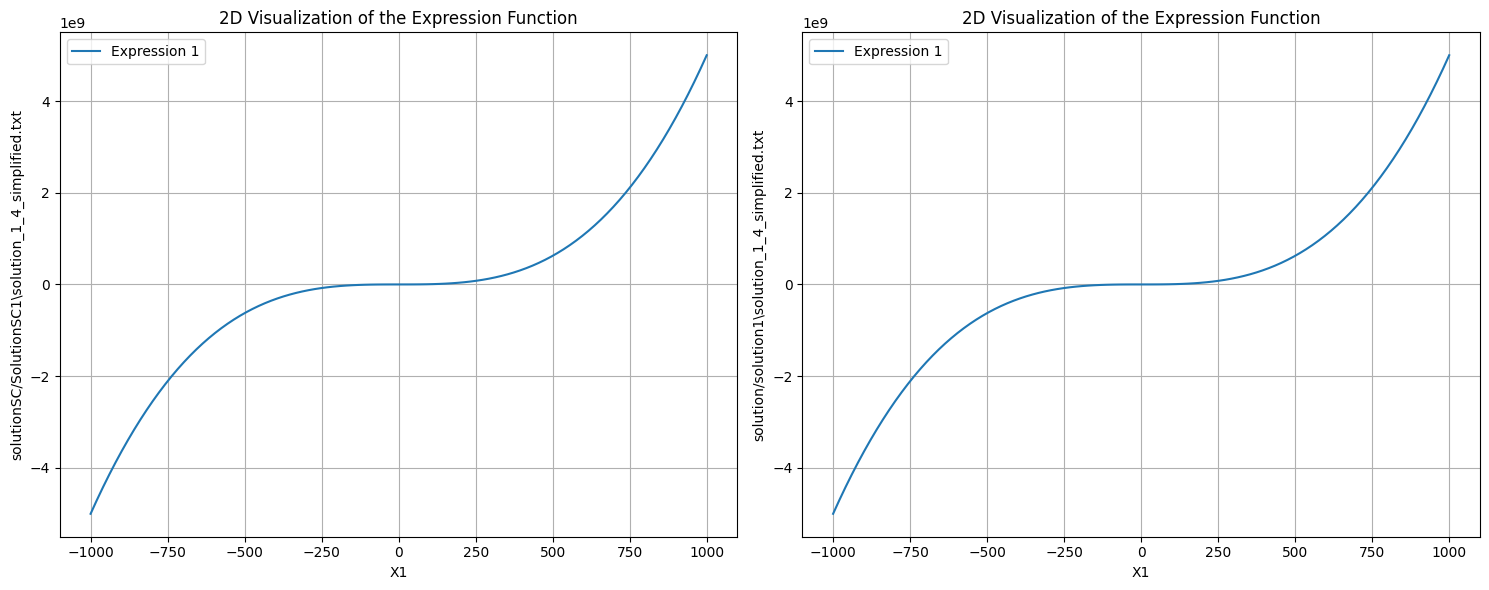

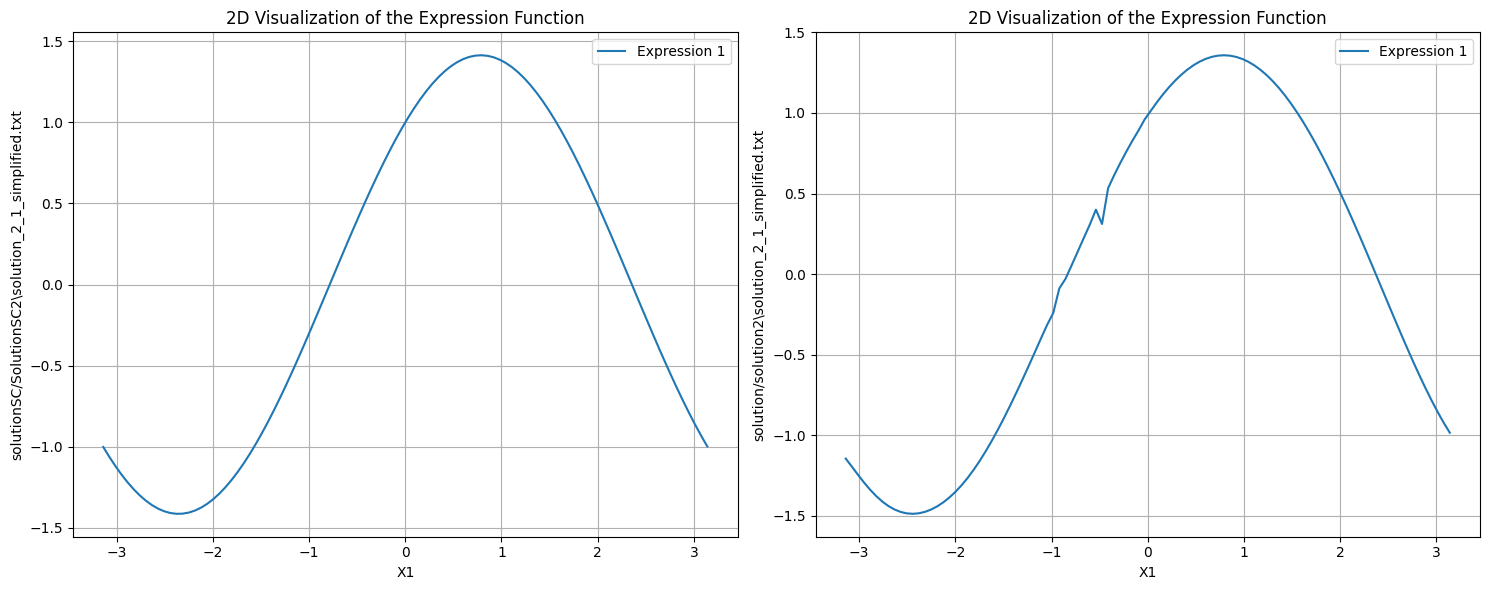

<lambdifygenerated-676>:2: RuntimeWarning: divide by zero encountered in divide
  return 0.27823867317911063*(-X1 + (3.314050220345445 - X1)*(-X1 + 3.7037014933959203/(X1*(0.18447405149276808 + 4.64772441681133/(-2.6719410385201394*X1 + 0.65640031217754573*(X1 - 3.9833138448140577)/(0.60938080043089711*(0.1295318454393708 - 0.87434240162334198*(1 - 0.3017455782235441*X1)**2)*(0.5251045231077271*(3.314050220345445 - X1)*(0.032127200992755498*X1 + 0.0089771765169832064*X1*(-(-6.9834446673324532 - 0.47636326475925017/((-1.8433949628501942 - 3.6818216624777014/(-X1 - 5.0904511166234369/(3.5877441387093434 - 5.5481154522503695/(-3.7745630011079612 - 0.2157348125414041/(-X1 + 3.6018077687661859*(1.0452616076550678*(-6.9834446673324532 + 0.056201284110107498/(X1*(-1.8433949628501942 - 3.6818216624777014/(1.5874309688232697 + 0.056036682535628774/X1))))/(-1.0740436376614335*X1 + 11.796144868162868*(1 - 0.3017455782235441*X1)**2 + 4.14356463983091) + 20.006965353954213 + 0.2019189484792403/(X1 

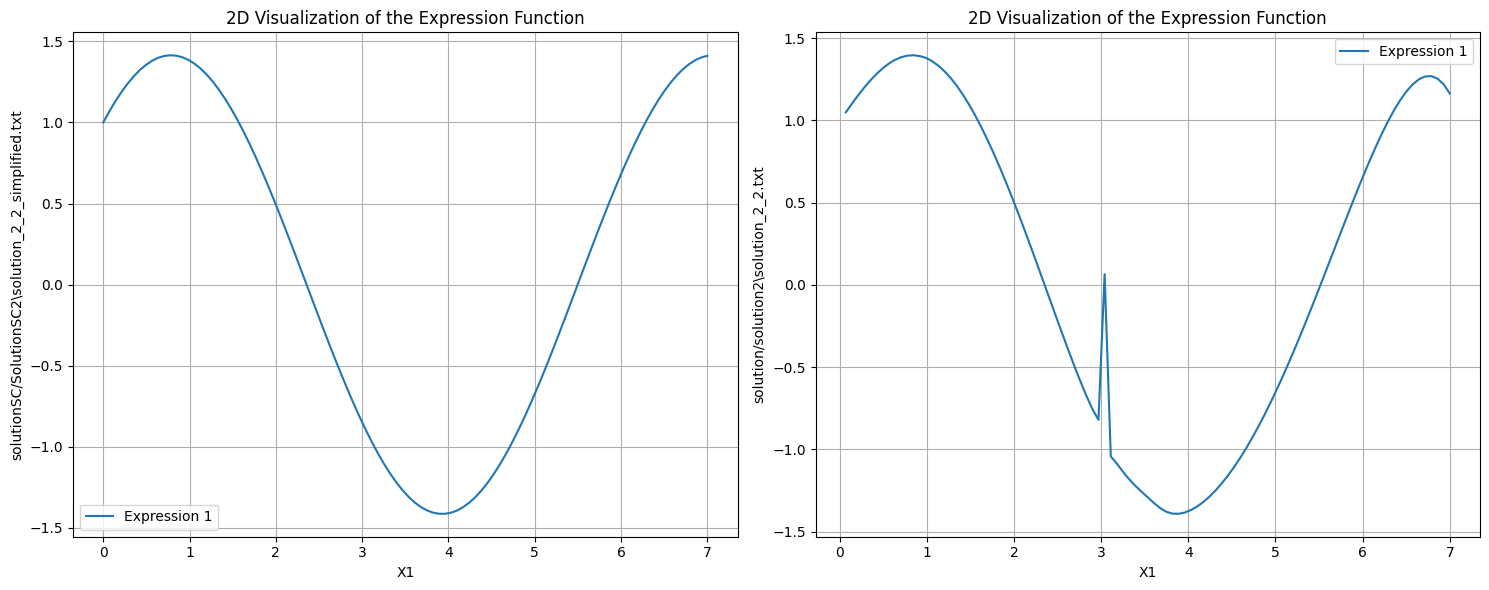

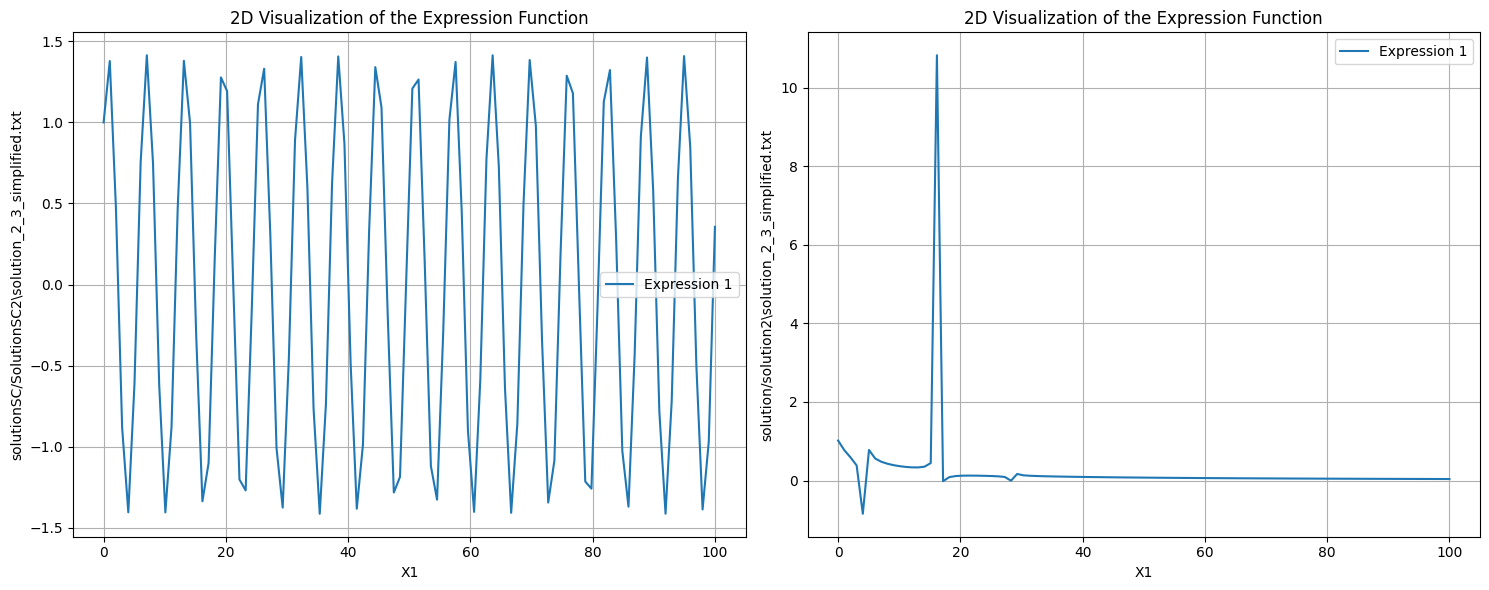

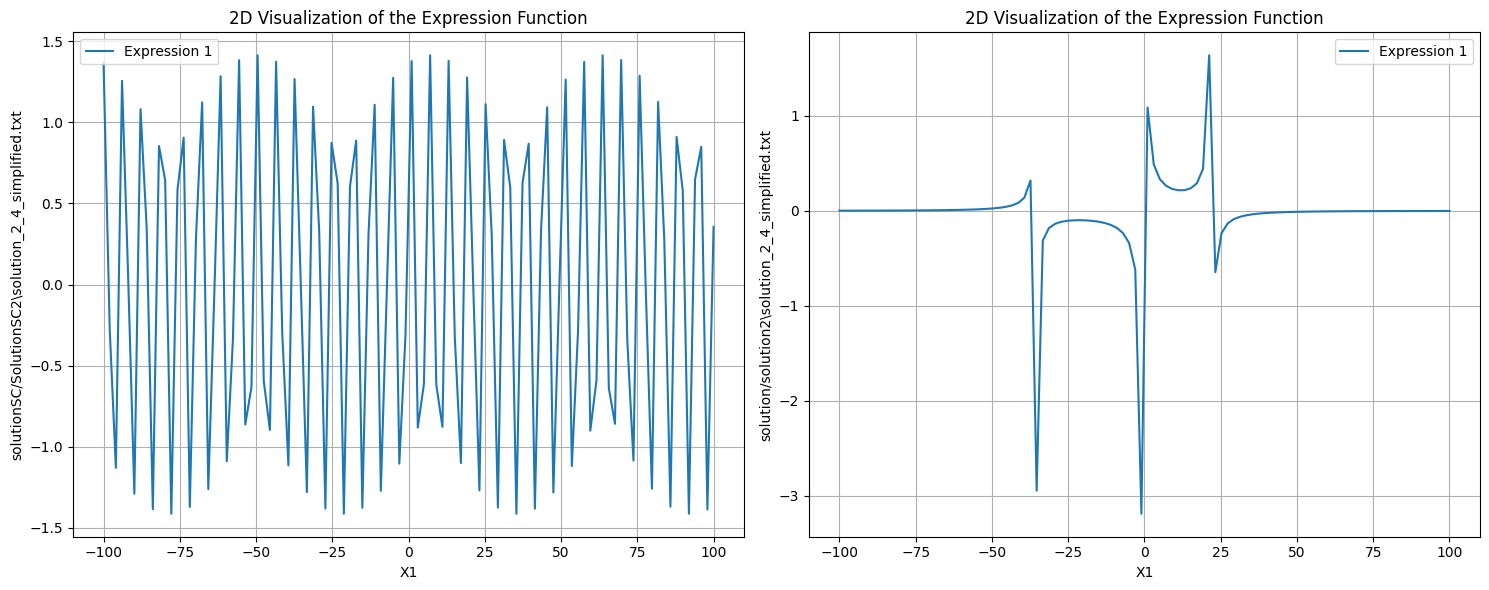

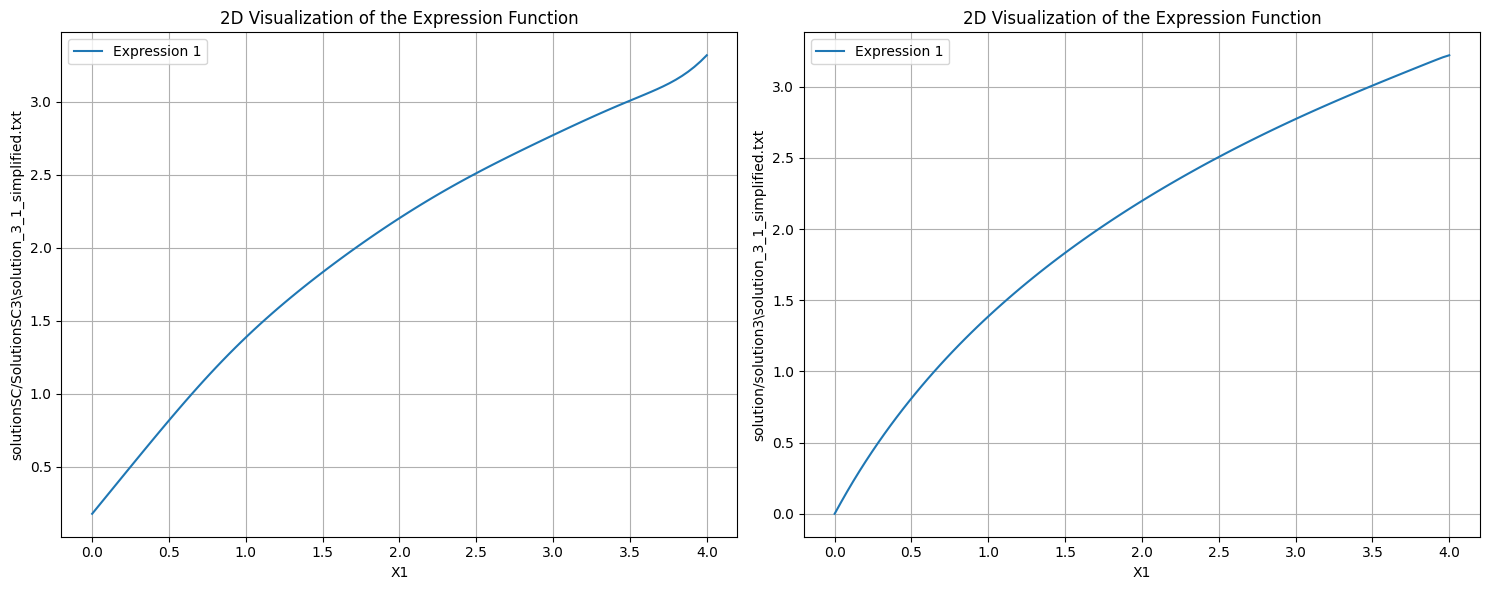

<lambdifygenerated-683>:2: RuntimeWarning: divide by zero encountered in divide
  return (X1*(0.067793046259135372*X1 + 0.11417056091956211)*(0.38046913369603397*X1 + 1.2933704513814269)*(0.067793046259135372*X1 + cos((0.08019905613026214*X1 + 1.7861629227822388*sin((23.05867911432701 + 24.679020882622384/X1)/(X1 + 1.7612135863652325)) - 3.6058562799893636)/(0.90031778831658061*sin((23.05867911432701 + 24.679020882622384/X1)/(X1 + 1.7612135863652325)) - 1.8175366365407785)) + 3.856669282220593) - 0.5166524468667688*X1 - 0.51416315962905659)/(X1*(0.067793046259135372*X1 + 0.11417056091956211)*(0.38046913369603397*X1 + 1.2933704513814269))
<lambdifygenerated-683>:2: RuntimeWarning: invalid value encountered in sin
  return (X1*(0.067793046259135372*X1 + 0.11417056091956211)*(0.38046913369603397*X1 + 1.2933704513814269)*(0.067793046259135372*X1 + cos((0.08019905613026214*X1 + 1.7861629227822388*sin((23.05867911432701 + 24.679020882622384/X1)/(X1 + 1.7612135863652325)) - 3.6058562799893636

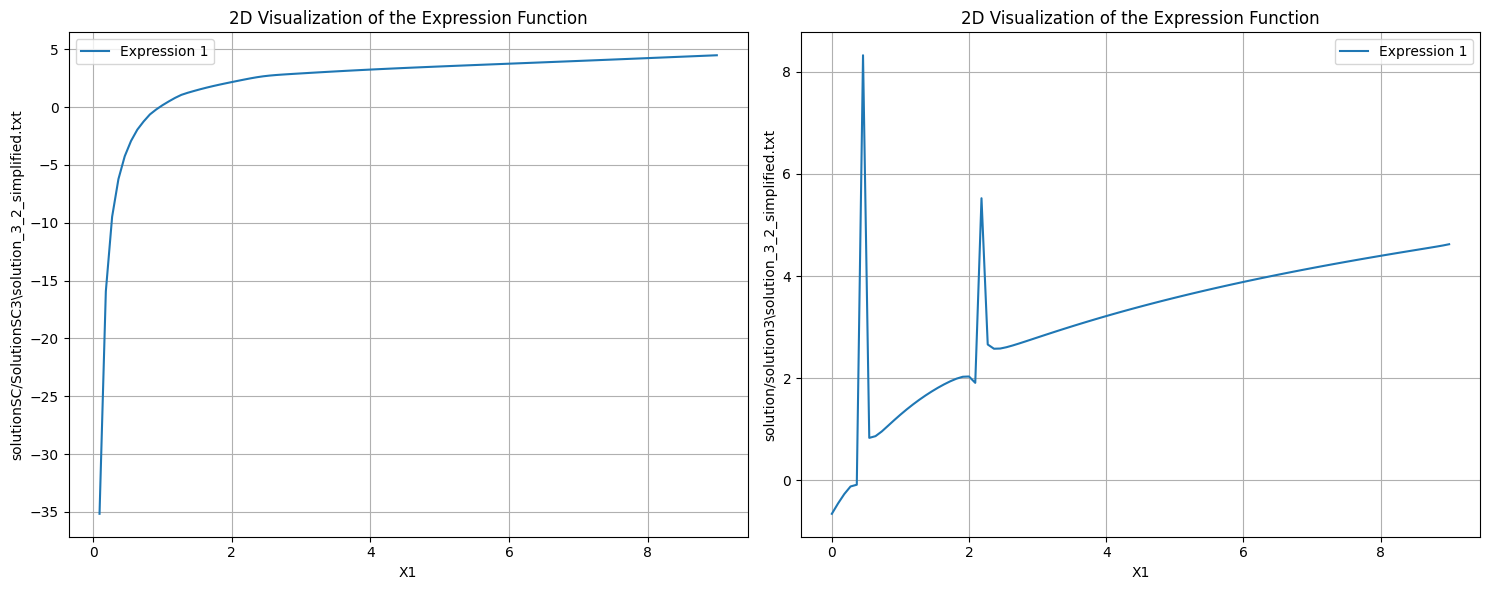

<lambdifygenerated-685>:2: RuntimeWarning: divide by zero encountered in divide
  return (1.2942863152008506*X1**3 + 21.203954905705036*X1**2 - 26.025110522065604*X1 + 4.5418640316936735)/(X1**2*(0.10960588475419291*X1 + 5.3651133716594623))


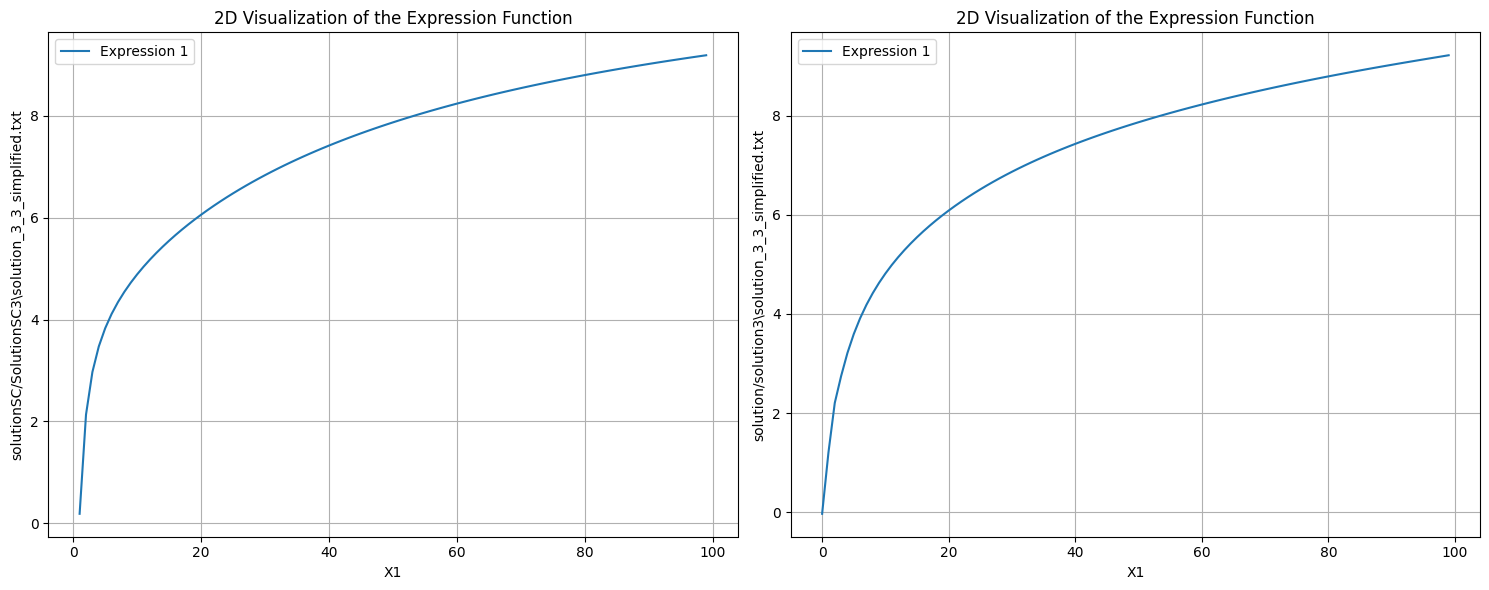

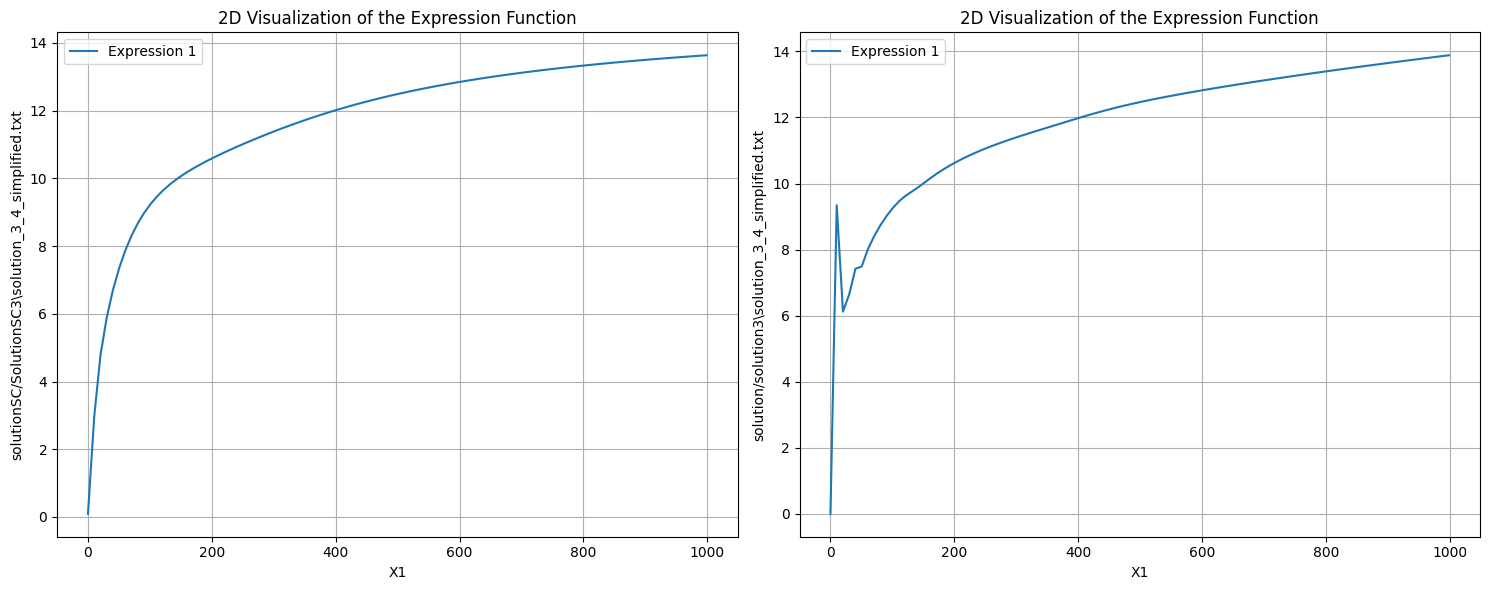

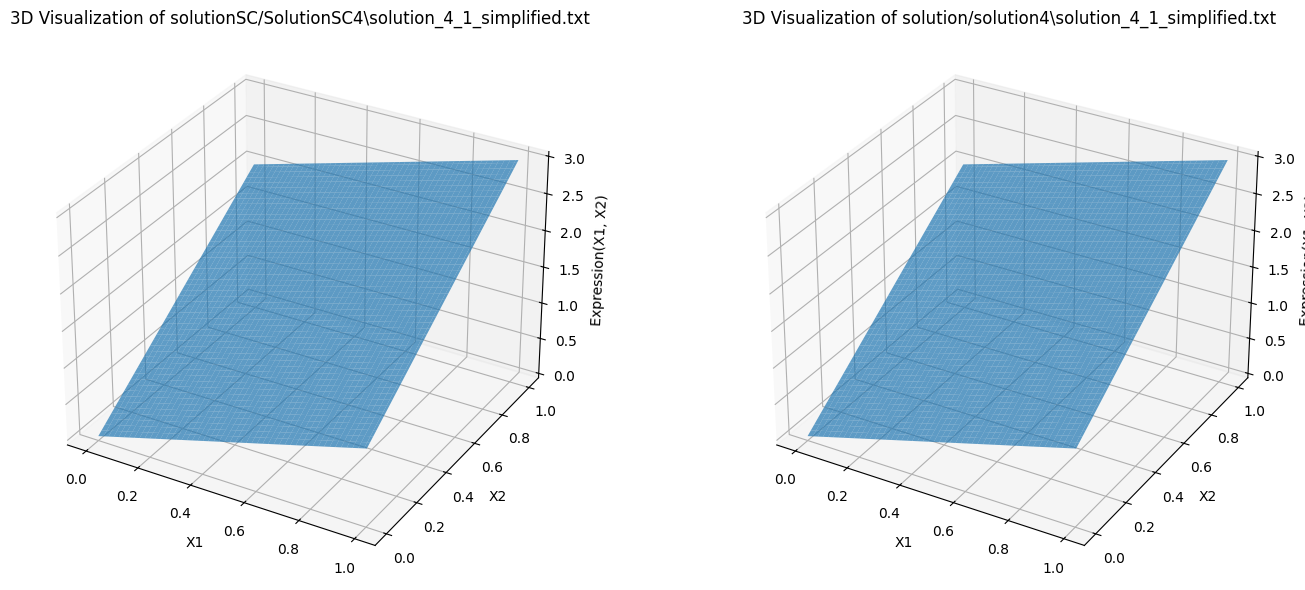

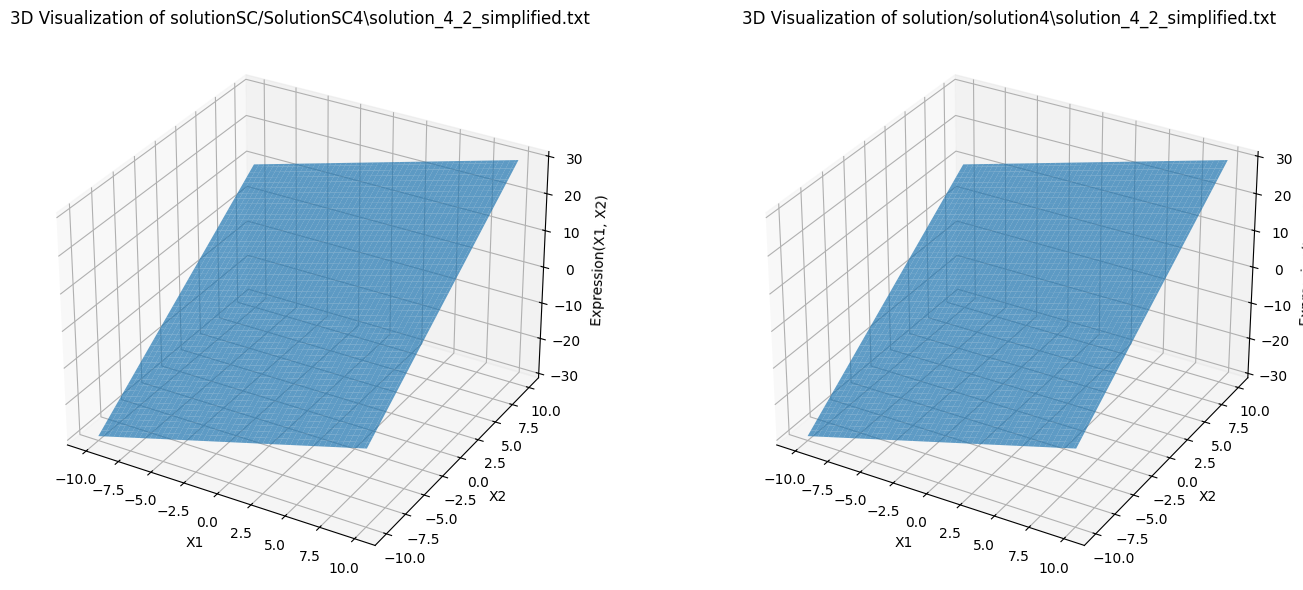

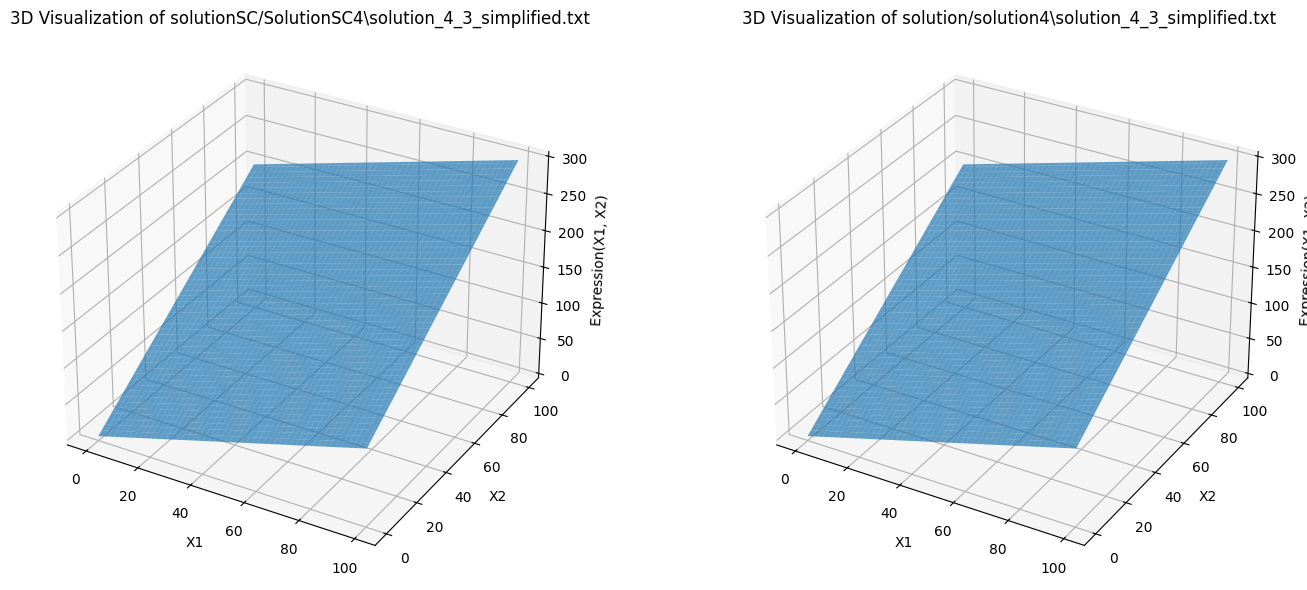

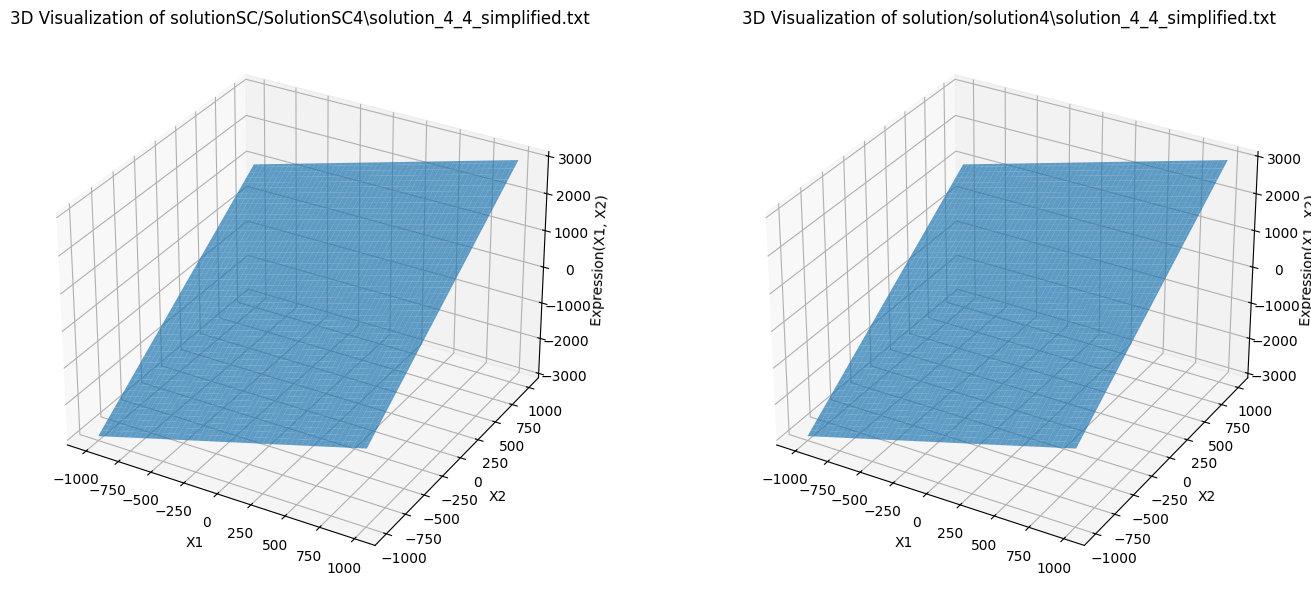

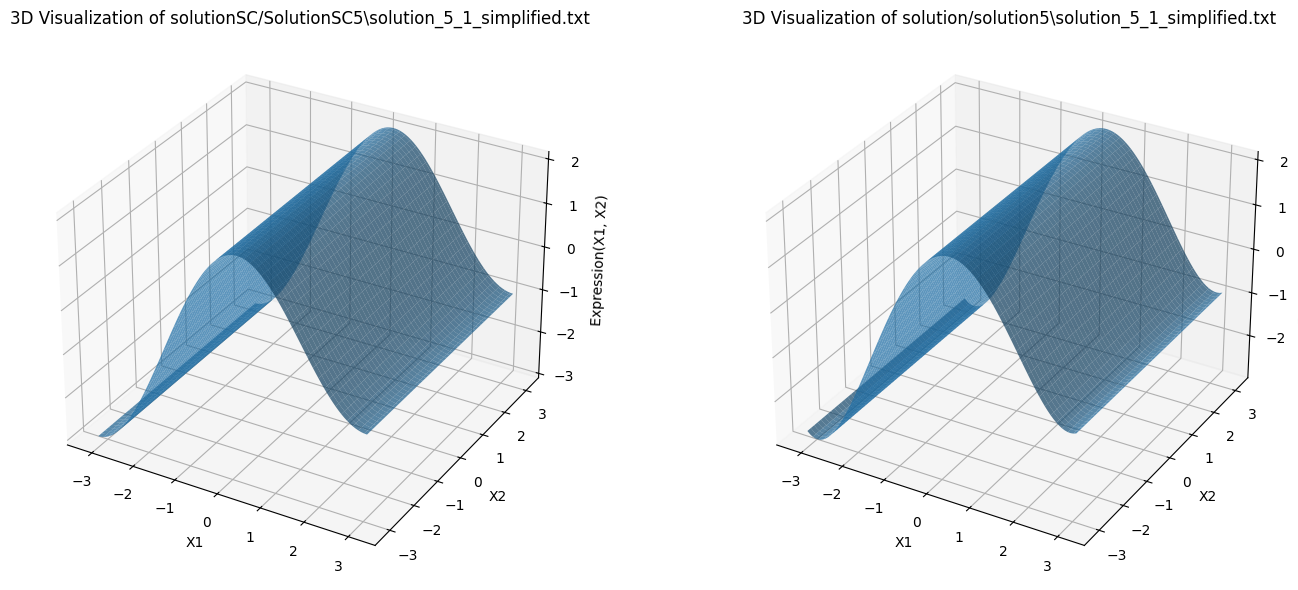

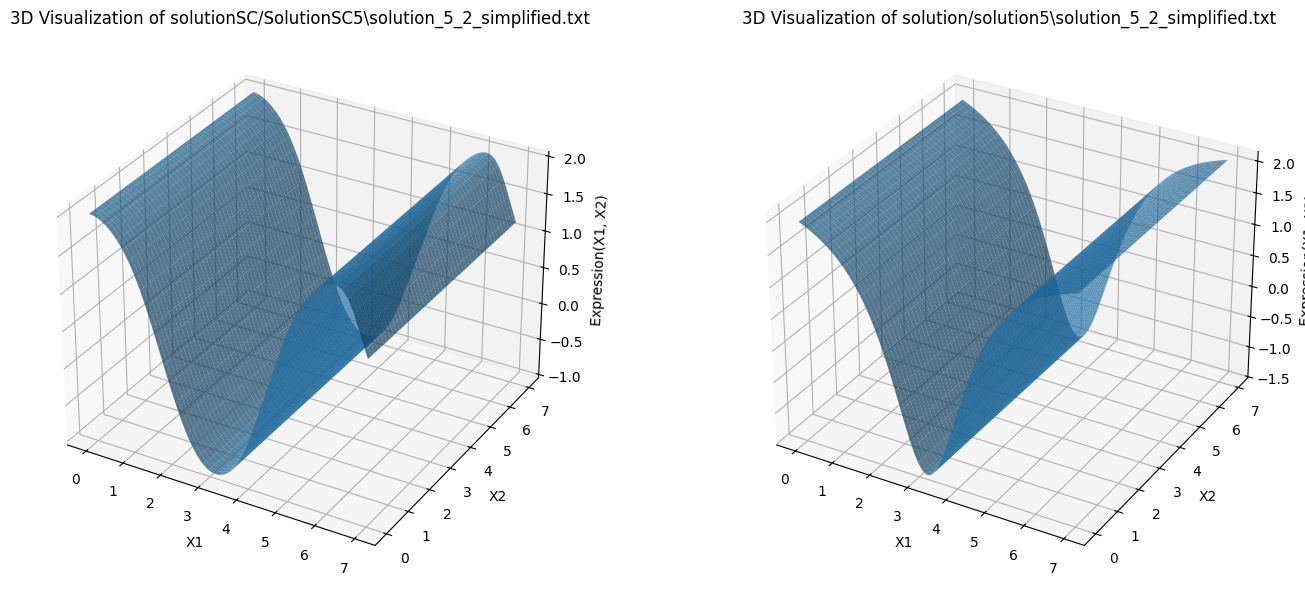

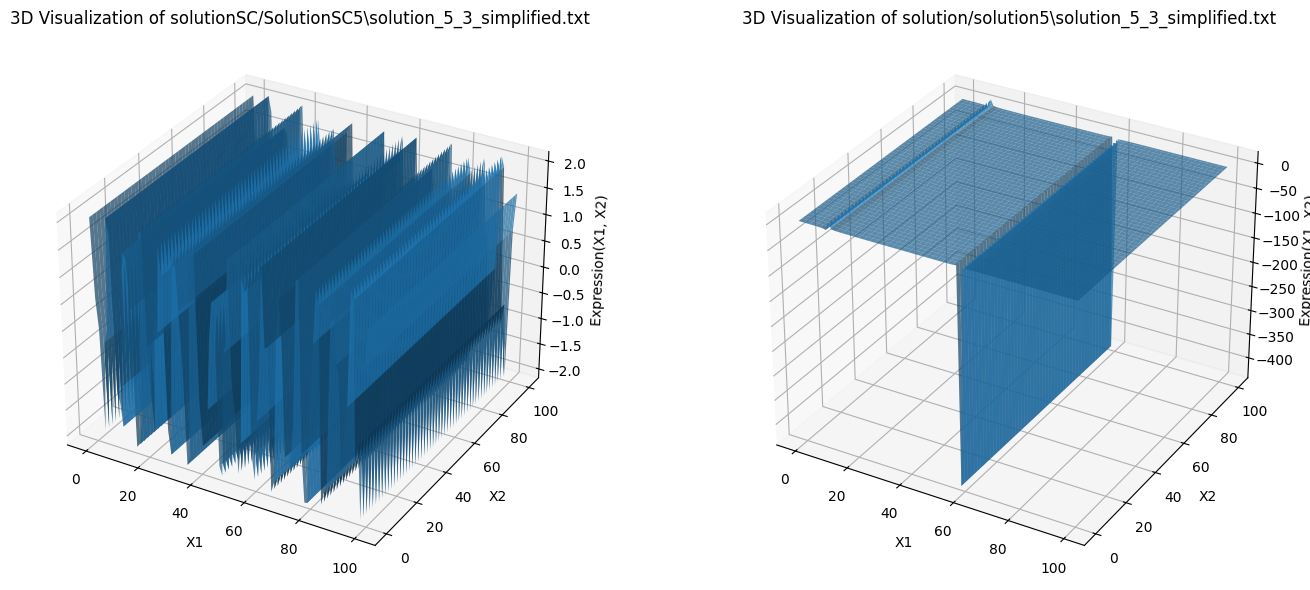

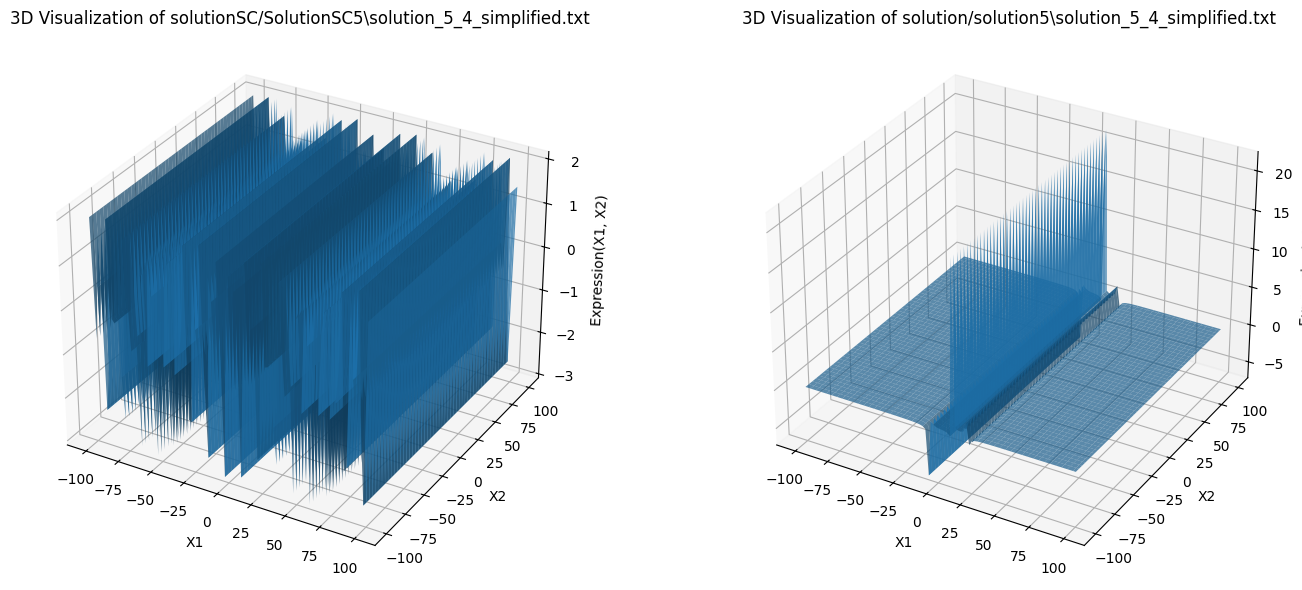

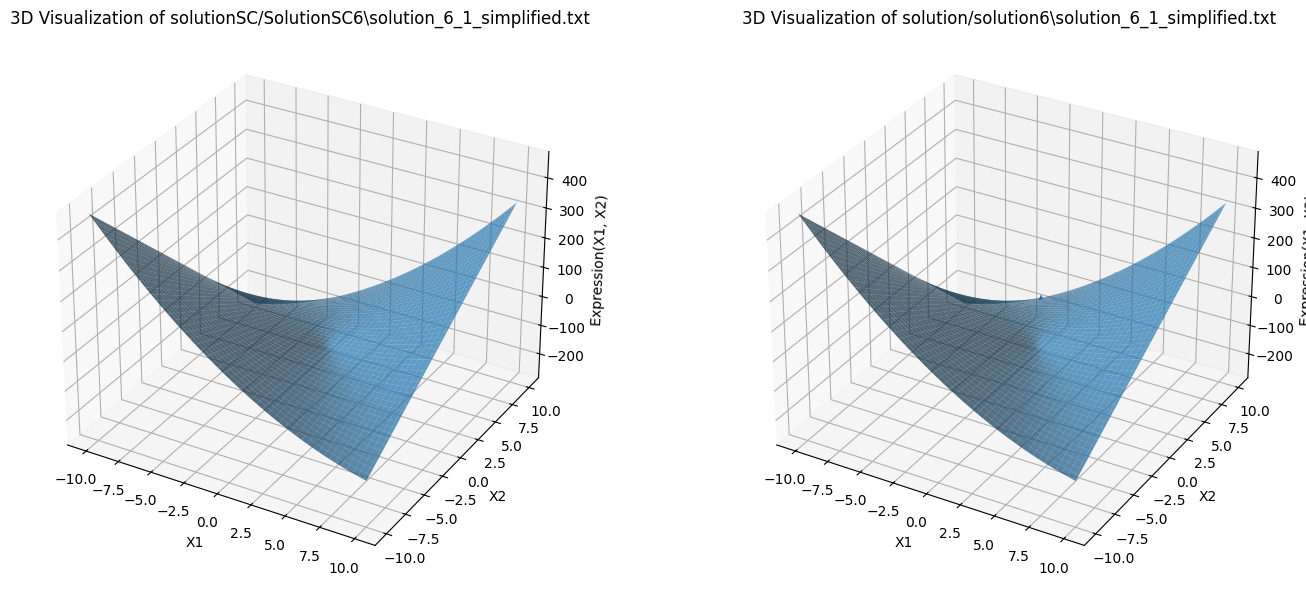

<lambdifygenerated-708>:2: RuntimeWarning: divide by zero encountered in divide
  return X1*(X1 + 3*X2 - (X2*(7.13832992303077 - 8.924807106363982/(X2*(0.1510678804696625*X1/((X1 - 8.779050739133737)*(6.9381791177805158*X1 + 6.9381791177805158*X2*(X2 + 0.026992578737274399) + 27.480842549563014 - (21.233410812897219*X1*X2 + 21.233410812897219*X1 + 266.23845880197758)/(9.184426783477288 + (24.369391386249858*X2 + 270.23788473591)/(X1 - 6.790268382457147)))) - 5.778484534008729))) - 5.268157819010874/(X2 - 5.136708842455164))/X1)
<lambdifygenerated-708>:2: RuntimeWarning: invalid value encountered in multiply
  return X1*(X1 + 3*X2 - (X2*(7.13832992303077 - 8.924807106363982/(X2*(0.1510678804696625*X1/((X1 - 8.779050739133737)*(6.9381791177805158*X1 + 6.9381791177805158*X2*(X2 + 0.026992578737274399) + 27.480842549563014 - (21.233410812897219*X1*X2 + 21.233410812897219*X1 + 266.23845880197758)/(9.184426783477288 + (24.369391386249858*X2 + 270.23788473591)/(X1 - 6.790268382457147)))) - 5.

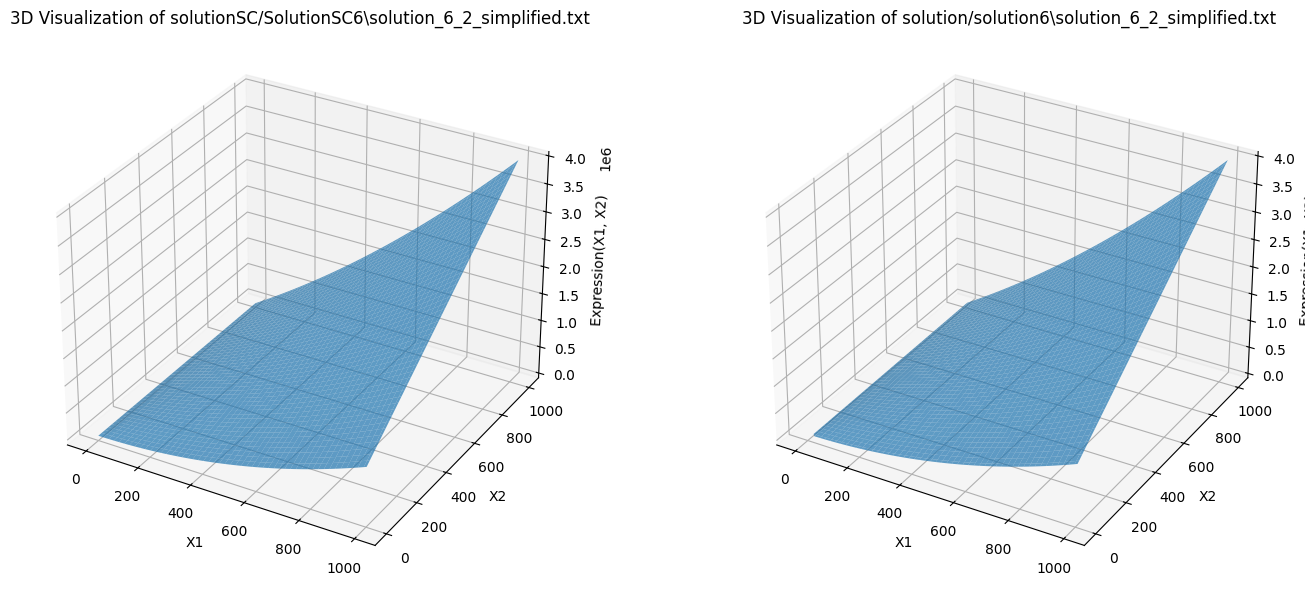

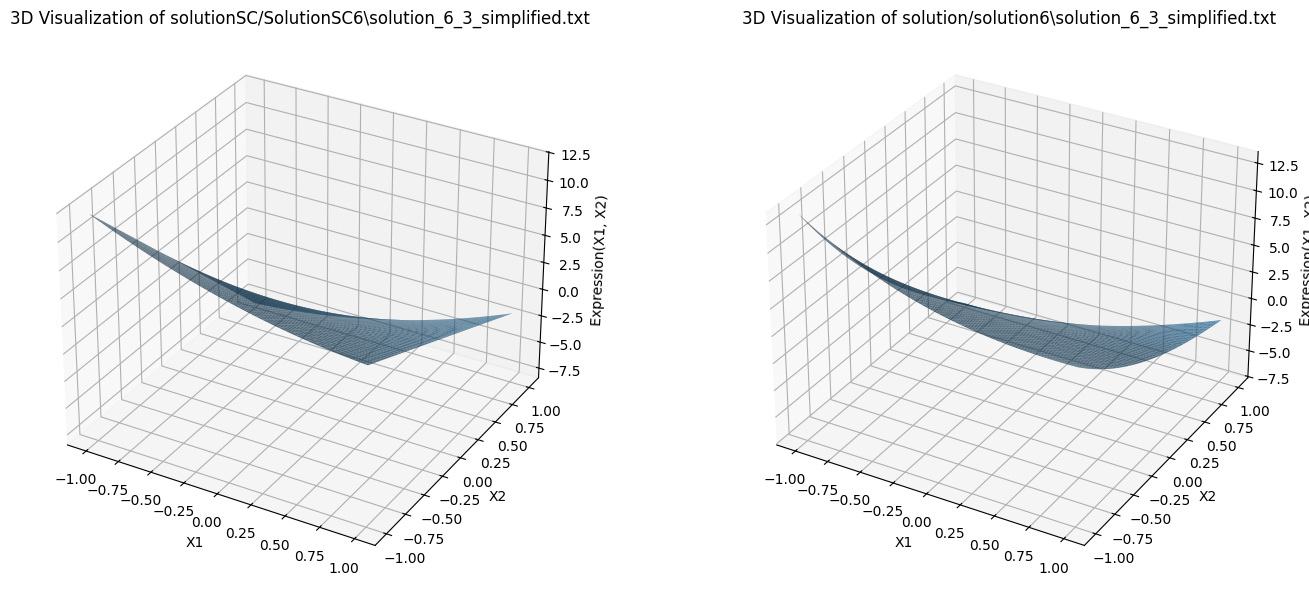

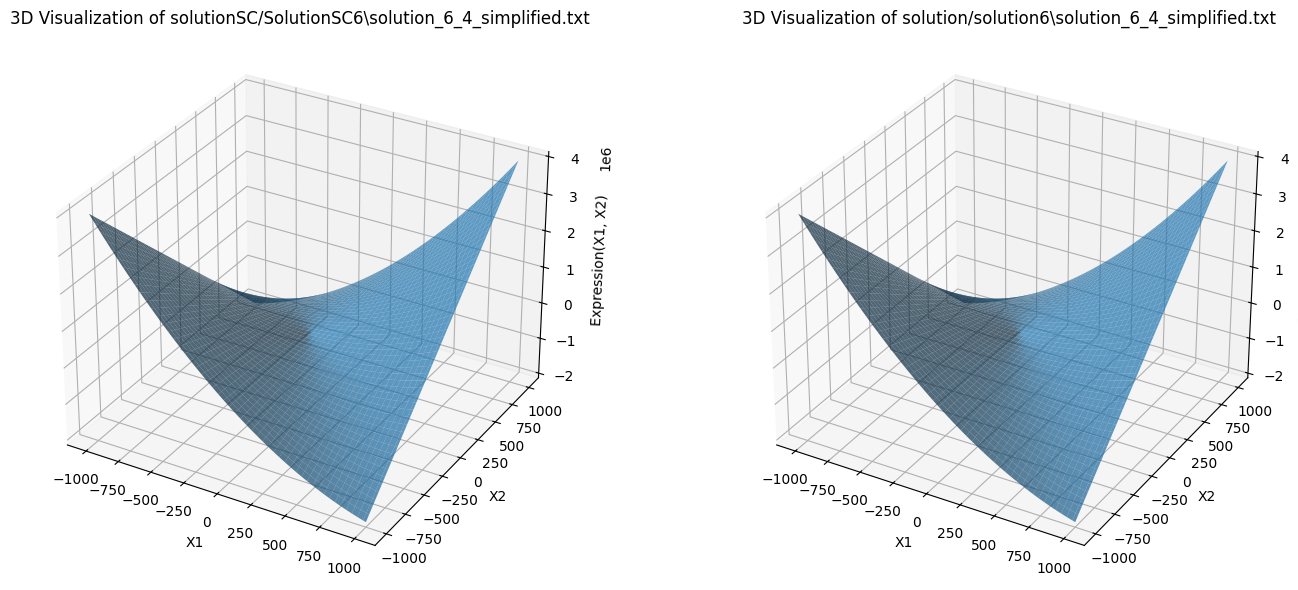

In [34]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

def load_and_evaluate_expression(expression_str, x_values, y_values=None):
    try:
        X1, X2 = sp.symbols('X1 X2')
        
        sympy_expr = sp.sympify(expression_str)
        
        symbols_in_expr = sympy_expr.free_symbols
        substitutions = {}
        for symbol in symbols_in_expr:
            if symbol not in {X1, X2}:
                substitutions[symbol] = 0
        
        sympy_expr = sympy_expr.subs(substitutions)
        
        if y_values is not None:
            expr_func = sp.lambdify((X1, X2), sympy_expr, 'numpy')
            X1_vals, X2_vals = np.meshgrid(x_values, y_values)
            return X1_vals, X2_vals, expr_func(X1_vals, X2_vals)
        else:
            expr_func = sp.lambdify(X1, sympy_expr, 'numpy')
            return expr_func(x_values)
    except Exception as e:
        print(f"Error evaluating expression: {e}")
        return None

def read_and_plot(paths, domain=(-10,10), is_3d=False):
    X = np.linspace(domain[0], domain[1], 100)
    
    y_values_list = []
    for path in paths:
        y_values = []
        try:
            with open(path, 'r') as file:
                for line in file:
                    expression_str = line.strip()
                    if is_3d:
                        X2 = np.linspace(domain[0], domain[1], 100)
                        X1_vals, X2_vals, Z_vals = load_and_evaluate_expression(expression_str, X, X2)
                        if Z_vals is not None:
                            y_values.append((X1_vals, X2_vals, Z_vals))
                    else:
                        y = load_and_evaluate_expression(expression_str, X)
                        if y is not None:
                            y_values.append(y)
        except FileNotFoundError:
            print(f"File {path} not found.")
            continue

        y_values_list.append(y_values)

    fig, axes = plt.subplots(1, len(paths), figsize=(15, 6), subplot_kw={'projection': '3d'} if is_3d else {})
    
    if len(paths) == 1:
        axes = [axes]
    
    for ax, y_values, path in zip(axes, y_values_list, paths):
        if y_values:
            if is_3d:
                for idx, (X1_vals, X2_vals, Z_vals) in enumerate(y_values):
                    ax.plot_surface(X1_vals, X2_vals, Z_vals, label=f'Expression {idx + 1}', alpha=0.7)
                ax.set_xlabel('X1')
                ax.set_ylabel('X2')
                ax.set_zlabel('Expression(X1, X2)')
                ax.set_title(f'3D Visualization of {path}')
            else:
                for idx, y in enumerate(y_values):
                    ax.plot(X, y, label=f'Expression {idx + 1}')
                ax.set_xlabel('X1')
                ax.set_ylabel(f'{path}')
                ax.set_title('2D Visualization of the Expression Function')
                ax.legend()
            ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    return True

domains = (
    ((-10, 10), (0, 100), (-1, 1), (-1000, 1000)),
    ((-3.14, 3.14), (0, 7), (0, 100), (-100, 100)),
    ((0, 4), (0, 9), (0, 99), (0, 999)),
    ((0, 1), (-10, 10), (0, 100), (-1000, 1000)),
    ((-3.14, 3.14), (0, 7), (0, 100), (-100, 100)),
    ((-10, 10), (0, 1000), (-1, 1), (-1000, 1000))
)

for folder_num in range(1, 7):
    folder_name = f"solutionSC/SolutionSC{folder_num}"
    folder_name1 = f"solution/solution{folder_num}"
    
    is_3d = folder_num in {4, 5, 6}
    
    for i in range(1, 5):  
        file_name_simplified = f"solution_{folder_num}_{i}_simplified.txt"
        file_name = f"solution_{folder_num}_{i}.txt"
        
        full_path1_simplified = os.path.join(folder_name, file_name_simplified)
        full_path1 = os.path.join(folder_name, file_name)
        
        full_path2_simplified = os.path.join(folder_name1, file_name_simplified)
        full_path2 = os.path.join(folder_name1, file_name)
        
        paths = []
        if os.path.exists(full_path1_simplified):
            paths.append(full_path1_simplified)
        else:
            paths.append(full_path1)
        
        if os.path.exists(full_path2_simplified):
            paths.append(full_path2_simplified)
        else:
            paths.append(full_path2)
        
        domain = domains[folder_num - 1][i - 1]
        read_and_plot(paths, domain=domain, is_3d=is_3d)